## Activity calculations
Calculates auc, average level, and activeMins metrics with a datetime of meal 

In [21]:
import numpy as np
import pandas as pd 
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

In [22]:
#auc for METs
datafile = pd.read_csv("C:\\Users\\namil\\Downloads\\CaM01-004_Fitbit.csv")
time = datafile['mins'].to_numpy()
mets = datafile['METs'].to_numpy()
datafile['Date_Time'] = pd.to_datetime(datafile['Date_Time'])

time = time[~np.isnan(time)]
mets = mets[~np.isnan(mets)]

tuples = zip(time,mets)
arr = np.asarray(list(tuples))

### Calculate metrics for all the meal times from a spreadsheet
can export to csv or print yay

In [23]:
auc2 = []
auc3 = []
activeMin2 = []
activeMin3 = []
avg2 = []
avg3 = []

def activityMetrics(timestring):
    #find start time
    #timestring = '9/18/2021 11:21:00 AM'
    #target_time = datetime.strptime(timestring, '%m/%d/%Y %I:%M:%S %p')
    target_time = datetime.strptime(timestring, '%m/%d/%Y %H:%M')
    theday = datafile[datafile['Date_Time'].dt.date == target_time.date()]
    starttime = theday.iloc[0]['Date_Time']
    minutes = int((target_time - starttime).total_seconds() / 60 + theday.iloc[0]['mins'])
    print(minutes)

    timeframe = 180
    #filter to time interval
    filtered = arr[arr[:,0] <= minutes + timeframe]
    filtered = filtered[filtered[:,0] >= minutes]
    plt.plot(filtered[:,0], filtered[:,1], label = "mets for 2 hrs")
    plt.legend()

    #calculate iauc for that time interval
    activity = filtered[:,1]
    area = auc(filtered[:,0], activity)
    
    auc3.append(area)
    avg3.append(np.average(activity)/10)
    activeMin3.append(len(activity[activity > 20]))
    print("three hours auc:", area)
    print("three hours average:", np.average(activity)/10)
    print("three hours activeMins:", len(activity[activity > 20]))
#     threehr.append(len(activity[activity > 20]))

    filtered = filtered[filtered[:,0] <= minutes + 120]
    activity = filtered[:,1]
    area = auc(filtered[:,0], activity)
    print("two hours auc:", area)
    print("two hours average:", np.average(activity)/10)
    print("two hours activeMins:", len(activity[activity > 20]))
    auc2.append(area)
    avg2.append(np.average(activity)/10)
    activeMin2.append(len(activity[activity > 20]))
#     twohr.append(len(activity[activity > 20]))


10/1/2021 8:04
484
three hours auc: 3000.0
three hours average: 1.6756906077348066
three hours activeMins: 30
two hours auc: 1753.5
two hours average: 1.4661157024793388
two hours activeMins: 10

10/1/2021 11:30
690
three hours auc: 4874.0
three hours average: 2.7154696132596685
three hours activeMins: 103
two hours auc: 2947.5
two hours average: 2.4578512396694214
two hours activeMins: 57

10/1/2021 18:57
1137
three hours auc: 3155.0
three hours average: 1.7491712707182319
three hours activeMins: 45
two hours auc: 2337.0
two hours average: 1.9479338842975207
two hours activeMins: 41

10/2/2021 9:52
2032
three hours auc: 2542.5
three hours average: 1.411049723756906
three hours activeMins: 26
two hours auc: 1935.5
two hours average: 1.609090909090909
two hours activeMins: 26

10/2/2021 13:29
2249
three hours auc: 3379.5
three hours average: 1.87292817679558
three hours activeMins: 55
two hours auc: 1801.0
two hours average: 1.4975206611570249
two hours activeMins: 21

10/2/2021 19:40


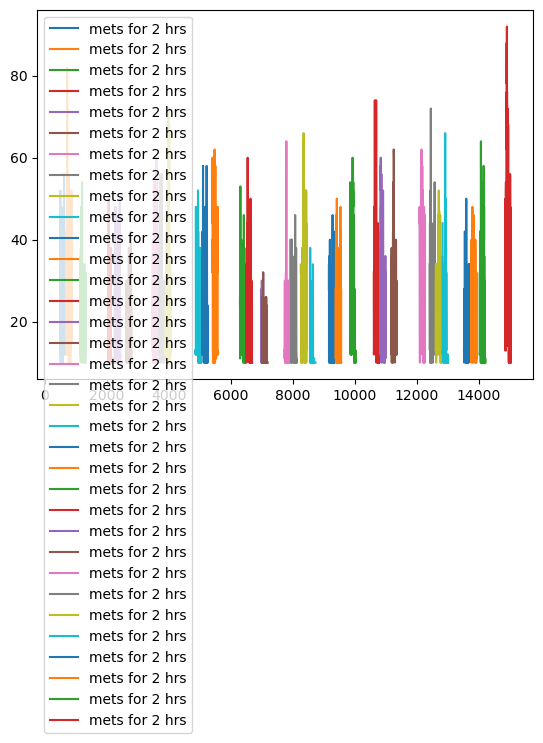

In [24]:
mldata = pd.read_csv("C:\\Users\\namil\\Downloads\\004.csv").dropna()
mldata['Meal Time'] = mldata['Meal Time'].to_numpy()
# twohr = []
# threehr = []
for i in mldata['Meal Time']:
    print('\n' + i)
    activityMetrics(str(i))
df = pd.DataFrame({'three hr auc': auc3, 'two hr auc': auc2, 'three hr activeMin': activeMin3, 
                  'two hr activeMin': activeMin2, 'three hr avg': avg3, 'two hr avg': avg2})
df.to_csv('activity metrics')